In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 706B-CF99

 Directory of C:\Users\User

06/03/2019  10:23 PM           216,887 abalone.csv
05/28/2019  01:43 PM            11,198 another-nonlinear-dataset.csv
05/21/2019  04:04 PM               348 AnscombesQuartet.csv
05/22/2019  03:20 PM           249,528 BULLMARKET.csv
05/30/2019  01:51 PM            12,646 cardata.csv
06/11/2019  01:21 PM            45,654 clouds.csv
06/04/2019  12:49 PM            18,231 elliptical-cloud-of-points.csv
06/03/2019  03:09 PM             2,087 five-small-clouds.csv
06/17/2019  10:38 AM             3,258 gender_submission.csv
06/04/2019  02:57 PM            31,939 sample_submission.csv
05/31/2019  11:19 AM               330 short_flux_data_file.csv
05/28/2019  02:20 PM               772 small-nonlinear-data-set.csv
05/21/2019  04:08 PM               142 somedata.csv
06/11/2019  01:22 PM           191,045 spirals.csv
06/04/2019  07:42 PM            35,892 submission.csv
06/06/2019  06:05 PM     

## Decision Trees with Bagging and Boosting

In [3]:
train=pd.read_csv("titanictrain.csv")
test=pd.read_csv("titanictest.csv")

In [4]:
# 891 rows and 12 columns
train[:11]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# avg age with NAN values
# class of tickets, how much they paid is how much people they have
# drop Cabin, Embarked, Fare, Name
# categorize gender/sex
# replace ages with mean and then with median

In [6]:
# drop ages with nan instead of getting the mean; find code for it

In [7]:
# Missing variables
total = train.isnull().sum().sort_values(ascending=False)
total.index.name = ['Feature']
print(total[:25])

[Feature]
Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [8]:
# dropping the data that does not contribute
data = train.drop(columns=['Cabin','Embarked','Name','Ticket'],axis=0)

In [9]:
# age median is taken to replace the NA data
#data['Age'] = data['Age'].interpolate()

In [10]:
# statistics summary
#data['Age'].describe()

In [11]:
# checking for missing data
data.isnull().sum().max()

177

In [12]:
# dropping the missing entries
data = data.dropna(axis=0)

In [13]:
# 714 rows and 8 columns
data[:11]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
6,7,0,1,male,54.0,0,0,51.8625
7,8,0,3,male,2.0,3,1,21.0750
8,9,1,3,female,27.0,0,2,11.1333
9,10,1,2,female,14.0,1,0,30.0708
10,11,1,3,female,4.0,1,1,16.7000


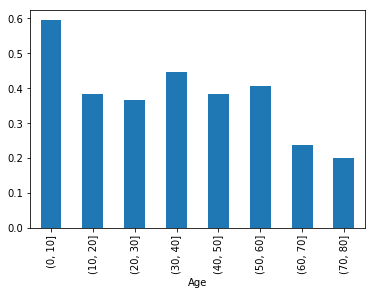

In [14]:
# survival rate per age
group_by_age = pd.cut(data["Age"], np.arange(0, 90, 10))
age_grouping = data.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [15]:
data_df = [data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 19), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 19) & (dataset['Age'] <= 39), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 39) & (dataset['Age'] <=59), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 4

TypeError: string indices must be integers

In [ ]:
data=pd.DataFrame(data)

In [ ]:
# group 0: under 11 years old
# group 1: 12-19 years  old
# group 2: 20-39 years old 
# group 3: 40-59 years old
# group 4: above 60 years old

data['Age'] = np.where(train['Age'].between(0,11),0,train['Age']) = 0
data['Age'] = np.where(train['Age'].between(12,19),0,train['Age']) = 1
data['Age'] = np.where(train['Age'].between(20-39),0,train['Age']) = 2
data['Age'] = np.where(train['Age'].between(40-59),0,train['Age']) = 3
data['Age'] = np.where(train['Age'].between(60-88),0,train['Age']) =4

In [ ]:
#group_names = ['Age_A','Age_B','Age_C']

In [ ]:
#data.groupby(['Age','Survived']).count()
#bins = [0,1,2]
#data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=group_names)

In [16]:
# one-hot encoding for Sex feature
data['Sex'] = pd.get_dummies(data.Sex, drop_first=True)

In [17]:
data[:11]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
6,7,0,1,1,54.0,0,0,51.8625
7,8,0,3,1,2.0,3,1,21.0750
8,9,1,3,0,27.0,0,2,11.1333
9,10,1,2,0,14.0,1,0,30.0708
10,11,1,3,0,4.0,1,1,16.7000


In [18]:
X = data.values
y = data['Survived'].values

In [19]:
X = np.delete(X,1,axis=1)

In [20]:
# Mean: survival rate
# Count: total observations
# Sum: people survived
# Sex: 0 female, 1 male
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
         mean count  sum
Sex                     
0    0.754789   261  197
1    0.205298   453   93

In [21]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
XTRAIN, XTEST, yTRAIN, yTEST=train_test_split(X,y)
nsplit=100

In [54]:
nsplit=100
depth=3
errs=[]
for j in range(nsplit):
    XTRAIN, XTEST, yTRAIN, yTEST=train_test_split(X,y)
    DT=tree.DecisionTreeClassifier(max_depth=depth)
    DT.fit(XTRAIN, yTRAIN)
    YP=DT.predict(XTEST)
    errs.append(1-accuracy_score(yTEST,YP))
print("Decision Tree Depth = %d mean error = %7.6f SD = %7.6f"\
     %(depth,np.mean(errs),np.std(errs)))

Decision Tree Depth = 3 mean error = 0.198324 SD = 0.028327


In [55]:
# 82.12% accuracy score using Decision Tree Classifier
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(XTRAIN,yTRAIN)
clf.score(XTEST,yTEST)

0.8212290502793296

In [56]:
# 83.80% accuracy score using Random Forest Classifier
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit (XTRAIN, yTRAIN)
clf.score (XTEST, yTEST)

0.8379888268156425

## Plot Final Tree

In [57]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO 

In [58]:
dot_data = tree.export_graphviz(DT, out_file=None, rotate=False, 
            feature_names=["Survived","Pclass","Sex", "Age","SibSp","Parch","Fare"],
            class_names=list(map(str,['Survived','Died'])),
 filled=True, rounded=True, special_characters=True)

In [59]:
graph2 = pydotplus.graph_from_dot_data(dot_data)  

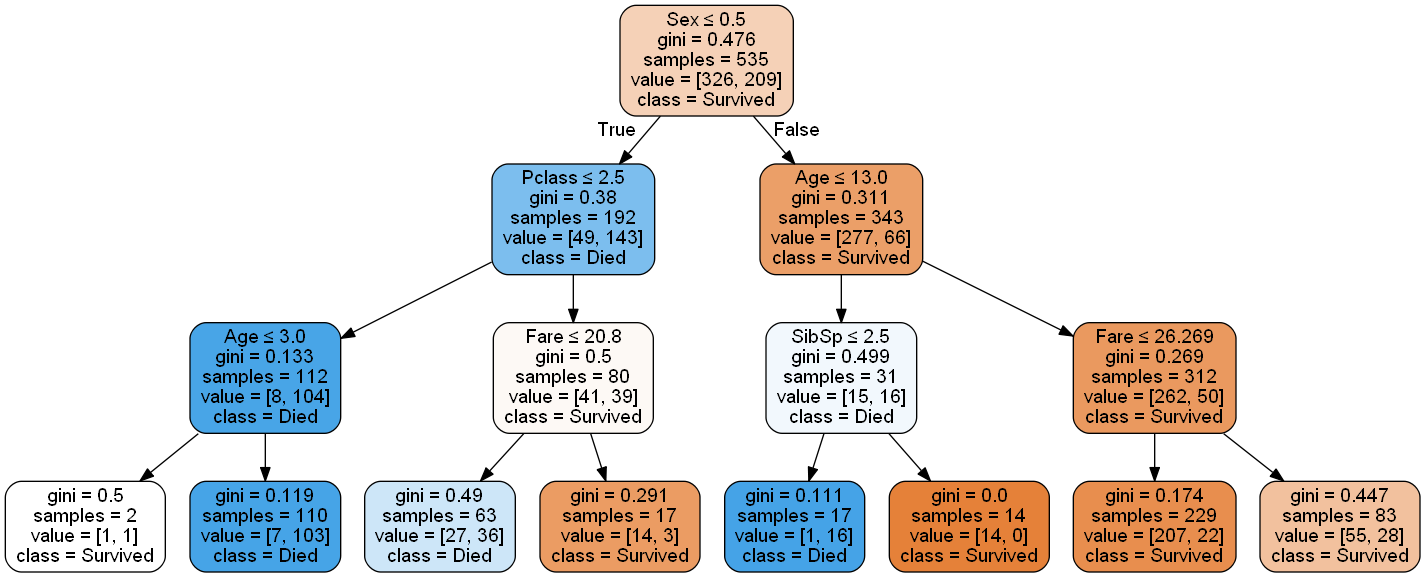

In [60]:
Image(graph2.create_png())

In [61]:
# accuracy of 82.04% across the training dataset
acc_decision_tree = round(DT.score(XTRAIN, yTRAIN) * 100, 2)
acc_decision_tree

83.36